# PCA

#### dependecies

In [43]:
%matplotlib inline
import random
from skimage import io
import matplotlib.pyplot as plt
from ipywidgets import interact
from keras.models import Model, Sequential 
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.applications.vgg16 import VGG16
from keras.optimizers import SGD
import numpy as np
from keras.layers import Input, Flatten, Dense, Dropout, Conv2D, MaxPooling2D, Merge
from keras.layers.normalization import BatchNormalization
from keras.optimizers import RMSprop
from keras import backend as K
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from keras.layers.core import Lambda
import keras
import os
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd
import sys
sys.path.append("../")
from networks.networks import *
from utils.utils import distance
CSV_DIR = '../datasets/dataset2/'
MODEL_DIR = '../models/'
LOGS_DIR = '../logs'

### Load Data

In [21]:
train_df = pd.read_csv(os.path.join(CSV_DIR, 'train_pairs.csv'))
test_df = pd.read_csv(os.path.join(CSV_DIR, 'test_pairs.csv'))

In [22]:
# train_df.head(20)

In [23]:
X1_paths = list(train_df.X1[:])
X2_paths = list(train_df.X2[:])

In [24]:
X1_test_paths = list(test_df.X1[:])
X2_test_paths = list(test_df.X2[:])

In [25]:
X1 = np.array(io.imread_collection(X1_paths))
X2 = np.array(io.imread_collection(X2_paths))

In [26]:
X1_test = np.array(io.imread_collection(X1_test_paths))
X2_test = np.array(io.imread_collection(X2_test_paths))

In [27]:
y = np.array(train_df.y)
y_test = np.array(test_df.y)

In [28]:
X1.shape, X2.shape, y.shape

((28733, 230, 105, 3), (28733, 230, 105, 3), (28733,))

In [29]:
X1_test.shape, X2_test.shape, y_test.shape

((14554, 230, 105, 3), (14554, 230, 105, 3), (14554,))

## PCA

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=64)

In [35]:
X1_flat = X1.reshape(28733, -1)

In [40]:
X1_flat_test = X1_test.reshape(14554, -1)
X2_flat_test = X2_test.reshape(14554, -1)

In [36]:
X1_flat

array([[ 46,  43,  50, ...,  44,  85, 103],
       [ 28,  72,  75, ...,  64, 130, 156],
       [ 42,  66,  78, ...,  56, 107, 128],
       ..., 
       [ 78,  97, 112, ..., 159, 208, 223],
       [ 46,  51,  44, ...,  58, 115, 144],
       [ 51, 105, 115, ...,  79, 135, 162]], dtype=uint8)

In [38]:
pca.fit(X1_flat)

PCA(copy=True, iterated_power='auto', n_components=64, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [41]:
X1_pca_test = pca.transform(X1_flat_test)
X2_pca_test = pca.transform(X2_flat_test)

In [44]:
test_distance = distance(X1_pca_test, X2_pca_test)

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

In [47]:
fpr, tpr, th = roc_curve(y_test, test_distance)

In [50]:
roc_auc_score(y_test, test_distance)

0.89422988568918904

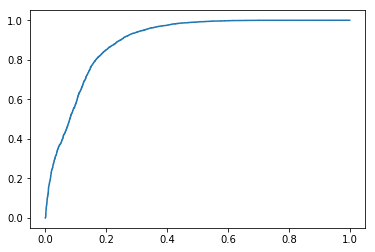

In [49]:
plt.plot(fpr, tpr);